In [305]:
import numpy as np
import pandas as pd
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import seaborn as sns

In [306]:
signatures_lm = pd.read_csv('signatures_lm.csv', index_col = 0)

In [378]:
gene_info = pd.read_table('geneinfo_beta.txt')
sig_info = pd.read_table('siginfo_beta.txt', low_memory=False)

In [308]:
sig_info = sig_info[sig_info['pert_type']=='trt_xpr']
selected_cols = ['sig_id', 'pert_type', 'pert_id',  'cmap_name', 'cell_iname', 'pert_itime']
sig_info = sig_info[selected_cols]
sig_info = sig_info.set_index('sig_id', drop = True)

In [309]:
fil = gene_info['feature_space']=='landmark'
genes_lm = gene_info[fil]
genes_lm = genes_lm.set_index('gene_id', drop = True)['gene_symbol']
genes_lm.index = genes_lm.index.astype(str)

In [310]:
cmap_names = list(set(sig_info.cmap_name.dropna()))

In [312]:
# map gene names of CRISPR signatures
genes_lm.index = genes_lm.index.astype('int')
signatures_lm.index = signatures_lm.index.map(genes_lm.to_dict())

In [313]:
gene_info[gene_info['gene_symbol'].isin(['PIK3CB', 'PTEN'])]

,gene_id,gene_symbol,ensembl_id,gene_title,gene_type,src,feature_space
5521,5291,PIK3CB,ENSG00000051382,"phosphatidylinositol-4,5-bisphosphate 3-kinase...",protein-coding,NCBI,best inferred
5751,5728,PTEN,ENSG00000171862,phosphatase and tensin homolog,protein-coding,NCBI,best inferred


In [314]:
# kivalasztani az egyes utvonalakat es a kozottuk levo enzimeket
# megnezni, hogy az egyes enzimeknek milyen a hasonlósági szignatúrája - ugyanonlyan valaszokat valtanak-e ki
# tf analízise a kiválasztott fehérjék szignatúráinak 
# ezen szignatúrák korrelációja / 
# osszehasonlitani, hogy az adott utvonalon melyek azok, amelyek 

In [315]:
signatures_lm[['PTEN', 'PIK3C2A', 'PIK3C3', 'PIK3CA', 'PIK3CD']]

,PTEN,PIK3C2A,PIK3C3,PIK3CA,PIK3CD
gene_id,,,,,
AARS,-0.121990,-0.005052,0.544939,-0.035961,0.258737
ABCF1,0.366276,0.077290,-0.241553,-0.363447,-0.102760
ABL1,-0.113158,-0.337396,0.093020,0.232283,0.444212
ACAA1,0.266358,0.391877,-0.251335,0.485727,0.042671
ACAT2,-0.010270,-0.529536,-0.578427,-0.147755,-0.346992
...,...,...,...,...,...
TXLNA,0.107338,0.059681,-0.395153,-0.284419,0.343842
SPRED2,0.114817,0.115396,0.011583,-0.586076,0.271600
EML3,-0.009672,-0.205750,0.075070,0.404086,0.125456


In [316]:
kinases = ['PIK3CA', 'PIK3CB', 'PIK3CD', 'PIK3CG', 'PIK3C2A','PIK3C2B','PIK3C2G','PIK3C3',
        'PI4K2A','PI4K2B','PIK4CA','PIK4CB', 'PIP5K1A','PIP5K1B','PIP5K1C','PIP4K2A','PIP4K2B',
         'PIP4K2C','PIP5K3']
           
phosphatases = ['PTEN','TPTE2','MTM1', 'MTMR1','MTMR2','MTMR3','MTMR4','MTMR6','MTMR7',
         'MTMR8','MTMR14','INPP4A','INPP4B','TMEM55A','TMEM55B','SYNJ1','SYNJ2','OCRL','INPP5B',
         'INPP5J','SKIP','INPP5D','INPPL1','INPP5E', 'PTPMT1','SACM1L','INPP5F','FIG4']

In [317]:
selected_genes = []
for gene in kinases+phosphatases:
    if gene in signatures_lm.columns:
        selected_genes.append(gene)

In [318]:
len(selected_genes), len(genes)

(19, 47)

In [319]:
signatures_lm[selected_genes]

,PIK3CA,PIK3CD,PIK3C2A,PIK3C2G,PIK3C3,PI4K2A,PI4K2B,PIP5K1A,PIP5K1B,PIP5K1C,PIP4K2A,PIP4K2B,PIP4K2C,PTEN,MTMR3,INPP4A,INPP5D,INPPL1,INPP5F
gene_id,,,,,,,,,,,,,,,,,,,
AARS,-0.035961,0.258737,-0.005052,-0.136772,0.544939,0.152865,0.253255,0.034078,0.003373,-0.089754,-0.317011,0.476925,-0.277929,-0.121990,0.129518,-0.025778,0.407173,-0.188058,0.211534
ABCF1,-0.363447,-0.102760,0.077290,0.229105,-0.241553,-0.131608,0.493553,0.120644,0.218375,0.077464,0.180817,0.605299,-0.150666,0.366276,0.315304,-0.085899,0.477565,0.626486,-0.181079
ABL1,0.232283,0.444212,-0.337396,-0.102180,0.093020,0.373007,0.364930,-0.063412,-0.343871,0.005176,0.136288,0.339199,-0.181829,-0.113158,0.208552,-0.033367,0.510987,0.381773,-0.363479
ACAA1,0.485727,0.042671,0.391877,-0.299946,-0.251335,-0.204151,-0.035441,0.188897,0.027449,-0.061520,-0.159382,0.037794,-0.135744,0.266358,0.220396,-0.152988,0.016601,-0.292164,-0.125963
ACAT2,-0.147755,-0.346992,-0.529536,0.492983,-0.578427,0.399539,-0.291698,0.067767,-0.118026,-0.204502,-0.008212,-0.294063,0.625967,-0.010270,-0.076260,0.588800,-0.331388,-0.105103,0.187439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TXLNA,-0.284419,0.343842,0.059681,-0.424539,-0.395153,-0.010595,-0.057586,0.063555,-0.114799,-0.104239,-0.134769,-0.385584,0.026580,0.107338,0.516399,0.436174,-0.144193,0.133144,-0.469736
SPRED2,-0.586076,0.271600,0.115396,-0.473985,0.011583,0.001806,0.154217,0.024748,0.357607,0.087737,0.228711,0.291319,-0.363525,0.114817,-0.063773,0.173880,0.088551,0.749766,-0.629920
EML3,0.404086,0.125456,-0.205750,-0.177499,0.075070,-0.142485,0.266497,0.284757,0.066066,-0.038052,-0.055777,0.184494,0.338353,-0.009672,0.056627,0.473023,0.038048,0.539626,-0.486805


## Speraman correlation all signatures 

In [487]:
enzyme = 'PTEN'

In [488]:
kos = list(signatures_lm.columns)
kos.remove(enzyme)

In [489]:
correlation = pd.DataFrame(index = kos, columns = ['spearmanr', 'rank'])
for ko in kos:
    correlation.loc[ko, 'spearmanr'] = spearmanr(signatures_lm[ko], signatures_lm[enzyme])[0]
correlation = correlation.sort_values(by='spearmanr')

In [490]:
correlation['rank'] = np.arange(len(correlation))+1

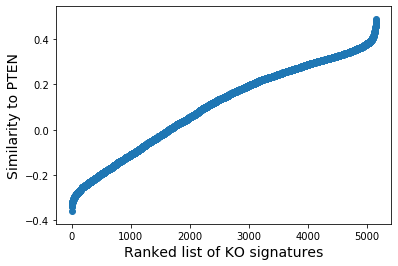

In [491]:
plt.scatter(correlation['rank'], correlation['spearmanr'])
plt.ylabel('Similarity to '+enzyme, fontsize = 14)
plt.xlabel('Ranked list of KO signatures', fontsize = 14)
plt.show()

In [493]:
correlation.loc['INPP4A']

spearmanr   -0.10906
rank            1012
Name: INPP4A, dtype: object

In [494]:
len(correlation)

5156

### All selected gene similarities

In [326]:
signatures_lm.head(2)

,INSC,SLC11A1,ACVR1,TIMD4,ITGAV,MAP3K15,HLA-DPB1,GPR141,NPRL2,LRIT1,...,CST6,TLR8,CEP72,COMMD7,FGB,CSPG4,HIST1H4I,THTPA,SPINK1,MMP27
gene_id,,,,,,,,,,,,,,,,,,,,,
AARS,0.377984,-0.240589,-0.362345,0.282716,0.688203,-0.211975,0.166573,0.133116,-0.040104,0.395365,...,0.060566,-0.066963,0.238562,-0.423124,-0.020524,-0.030426,0.084707,0.067905,0.105873,0.053400
ABCF1,-0.188978,-0.136058,-0.269003,-0.165624,0.836263,-0.282474,0.356345,0.327519,0.822711,0.406417,...,0.101084,0.425875,-0.156778,1.093917,-0.191202,0.714623,0.218205,-0.034150,-0.068662,0.634815


In [332]:
kinases_selected = list(np.intersect1d(kinases, selected_genes))
phosphatases_selected = list(np.intersect1d(phosphatases, selected_genes))

In [345]:
similarities_kinases = pd.DataFrame(index = kinases_selected, columns = kinases_selected)
for gene in kinases_selected:
    for ko in kinases_selected:
        similarities_kinases.loc[gene, ko] = spearmanr(signatures_lm[gene], signatures_lm[ko])[0]
similarities_kinases = similarities_kinases.astype('float')

In [348]:
similarities_phosphatases = pd.DataFrame(index = phosphatases_selected, columns = phosphatases_selected)
for gene in phosphatases_selected:
    for ko in phosphatases_selected:
        similarities_phosphatases.loc[gene, ko] = spearmanr(signatures_lm[gene], signatures_lm[ko])[0]
similarities_phosphatases = similarities_phosphatases.astype('float')

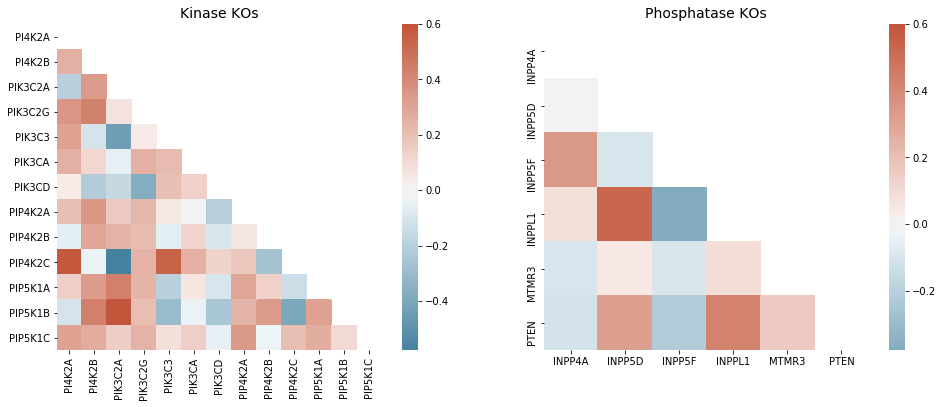

In [400]:
mask_kinases = np.triu(np.ones_like(similarities_kinases, dtype=bool))
mask_phosphatases = np.triu(np.ones_like(similarities_phosphatases, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 6))
sns.heatmap(similarities_kinases, mask = mask_kinases, cmap = cmap, vmax=.6, center=0,  ax = ax1)
ax1.set_title('Kinase KOs', fontsize = 14)
sns.heatmap(similarities_phosphatases, mask = mask_phosphatases,  vmax=.6, center=0, cmap = cmap, ax = ax2)
ax2.set_title('Phosphatase KOs', fontsize = 14)
plt.show()

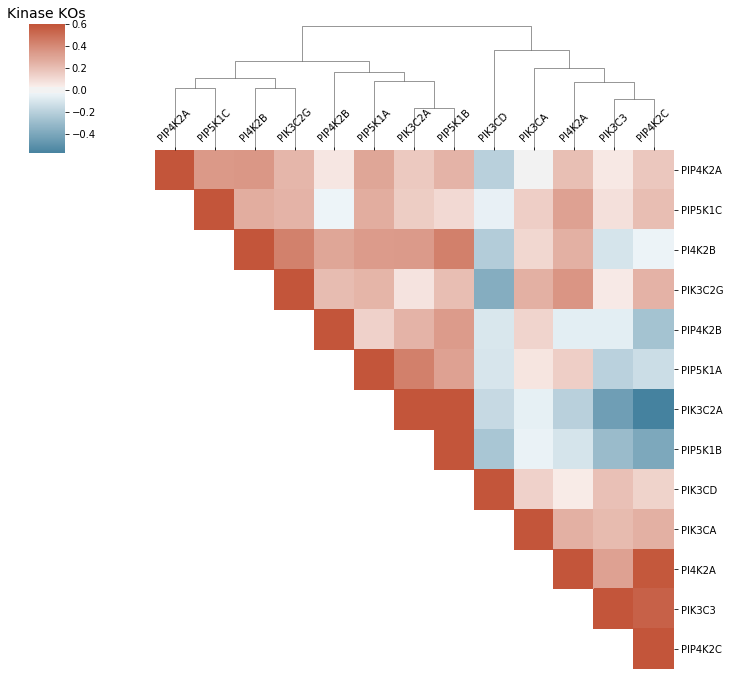

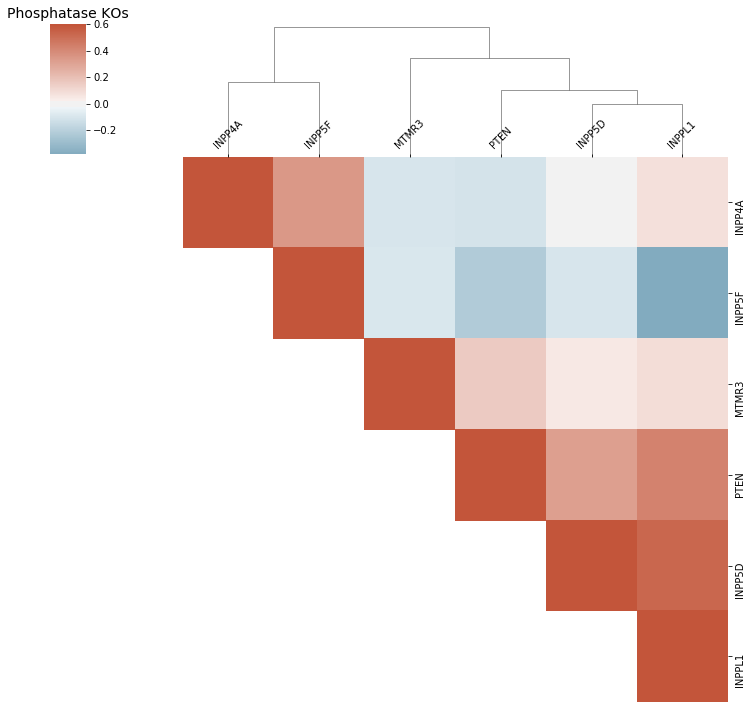

In [486]:
g = sns.clustermap(similarities_kinases)
plt.close()
mask_kinases = ~np.triu(np.ones_like(similarities_kinases, dtype=bool))
mask_kinases = mask_kinases[np.argsort(g.dendrogram_row.reordered_ind),:]
mask_kinases = mask_kinases[:,np.argsort(g.dendrogram_col.reordered_ind)]
g = sns.clustermap(similarities_kinases,  cmap = cmap,  center=0, mask = mask_kinases, vmax = .6, 
#                   dendrogram_ratio=(.2, .2),
#                     cbar_pos=(0.2, 1, 0.6, .011),
#                    cbar_kws={"orientation": "horizontal"}
                  )
                  

ax = g.ax_heatmap
ax.xaxis.tick_top()
ax.tick_params(axis='x', labelrotation=45)
plt.title('Kinase KOs', fontsize = 14)
g.ax_row_dendrogram.remove()

g = sns.clustermap(similarities_phosphatases)
plt.close()
mask_phosphatases = ~np.triu(np.ones_like(similarities_phosphatases, dtype=bool))
mask_phosphatases = mask_phosphatases[np.argsort(g.dendrogram_row.reordered_ind),:]
mask_phosphatases = mask_phosphatases[:,np.argsort(g.dendrogram_col.reordered_ind)]
g2 = sns.clustermap(similarities_phosphatases,  cmap = cmap,  center=0, mask = mask_phosphatases, vmax = .6)
ax = g2.ax_heatmap
ax.xaxis.tick_top()
ax.tick_params(axis='x', labelrotation=45)
plt.title('Phosphatase KOs', fontsize = 14)
g2.ax_row_dendrogram.remove()



# g = sns.clustermap(df.corr(), center=0, cmap="vlag",
#                    row_colors=network_colors, col_colors=network_colors,
#                    dendrogram_ratio=(.1, .2),
#                    cbar_pos=(.02, .32, .03, .2),
#                    linewidths=.75, figsize=(12, 13))

In [441]:
correlation.loc[correlation.index.isin(selected_genes), :]

,spearmanr,rank
PIP4K2C,-0.577384,130
PIK3C3,-0.442948,560
INPP5F,-0.250789,1191
PI4K2A,-0.196839,1336
INPP4A,-0.194944,1347
PIK3CD,-0.157048,1467
PIK3CA,-0.0490111,1774
MTMR3,-0.0246444,1848
PIK3C2G,0.069542,2150
PIP5K1C,0.152,2461
